<img src="https://d24cdstip7q8pz.cloudfront.net/t/ineuron1/content/common/images/final%20logo.png" height=50% width=50% alt-text="iNeuron.ai logo">

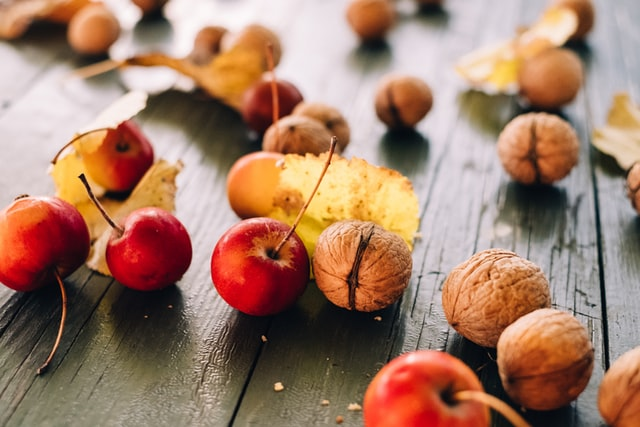<span>Photo by <a href="https://unsplash.com/@freestocks?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">freestocks</a> on <a href="https://unsplash.com/@freestocks?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

## Table of Content
- **<a href="#2.5">Multi- Collinearity</a>**
  - **<a href="#2.5_">Why Should We Care About Multi-Collinearity?</a>**
  - **<a href="#2.5.1">Pearson Correlation</a>**
  - **<a href="#2.5.2">Kendall Correlation</a>**
  - **<a href="#2.5.3">Spearman Correlation</a>**
  - **<a href="#2.5.4">Variance Inflation Factor (VIF)</a>**
  - **<a href="#2.5.5">Pairplot by Seaborn</a>**
  - **<a href="#2.5.6">Remedies for Multicollinearity</a>**


<a id="2.5"></a>
## 2.5 Multi- Collinearity

**Origin of the word:** The word multi-collinearity consists of two words:Multi, meaning multiple, and Collinear, meaning being linearly dependent on each other. 

For e.g.,
		Let’s consider this equation
		$ a+b=1  => b=1-a $
        
It means that ‘b’ can be represented in terms of ‘a’ i.e., if the value of ‘a’ changes, automatically the value of ‘b’ will also change. This equation denotes a simple linear relationship among two variables.

**Definition:** The purpose of executing a Linear Regression is to predict the value of a 	dependent variable based on certain independent variables.

So, when we perform a Linear Regression, we want our dataset to have variables which are independent i.e., we should not be able to define an 	independent variable with the help of another independent variable  	because now in our model we have two variables which can be defined based 	on a certain set of independent variables which defeats the entire purpose.

* `Multi-collinearity` is the statistical term to represent this type of a relation amongst the independent variable- when the independent variables are not so independent😊.
* We can define multi-collinearity as the situation where the independent variables (or the predictors) have strong correlation amongst themselves.

The results will be between -1 and 1. You will very rarely see 0,-1 or 1. You'll get a number somewhere in between those values. The closer the value of r gets to zero, the greater the variation the data points are around the line of best fit. 
- High correlation: `0.5 to 1.0 or -0.5 to 1.0` 
- Medium correlation: `0.3 to 0.5 or -0.3 to 0.5` 
- Low correlation: `0.1 to 0.3 or -0.1 to -0.3` 

<img src="FeatureEng_Imgs/FE8.png" width="600"/>

The mathematical flow for multicollinearity can be shown as:

<img src="FeatureEng_Imgs/FE7.png" width="600"/>

<a id="2.5_"></a>
### Why Should We Care About Multi-Collinearity?
* The coefficients in a Linear Regression model represent the extent of change in Y when a certain x (amongst X1,X2,X3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the dependent variable will also be changed. It means that our model itself becomes a bit flawed.
* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.
* As the extent of the collinearity increases, there is a chance that we might produce an overfitted model. An overfitted model works well with the test data but its accuracy fluctuates when exposed to other data sets. 
* Can result in a Dummy Variable Trap.

<a id="2.5.1"></a>
### 2.5.1 Pearson Correlation
A Pearson product-moment correlation coefficient attempts to establish a line of best fit through a dataset of two variables by essentially laying out the expected values and the resulting Pearson's correlation coefficient indicates how far away the actual dataset is from the expected values. Depending on the sign of our Pearson's correlation coefficient, we can end up with either a negative or positive correlation if there is any sort of relationship between the variables of our dataset.

The population correlation coefficient ${\displaystyle \rho _{X,Y}}{\displaystyle \rho _{X,Y}}$ between two random variables ${\displaystyle X}$ and ${\displaystyle Y}$ with expected values ${\displaystyle \mu _{X}}\mu _{X}$ and ${\displaystyle \mu _{Y}}{\displaystyle \mu _{Y}}$ and standard deviations ${\displaystyle \sigma _{X}}\sigma _{X}$ and ${\displaystyle \sigma _{Y}}\sigma_Y$ is defined as

$${\displaystyle \rho_{X,Y}=\operatorname {corr} (X,Y)={\operatorname {cov} (X,Y) \over \sigma _{X}\sigma _{Y}}={\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}}}$$

>**Note:** where ${E}$  is the expected value operator, ${cov}$  means covariance, and ${corr}$ is a widely used alternative notation for the correlation coefficient. The Pearson correlation is defined only if both standard deviations are finite and positive. [Source](https://en.wikipedia.org/wiki/Covariance)

***The Pearson correlation coefficient has values ranges from -1 to 1***
- A value exact 0 indicates no correlation
- A value closer to 0 indicates weaker correlation 
- A value closer to 1 indicates stronger positive correlation
- A value closer to -1 indicates stronger negative correlation


**Similar to Pearson, there are other method to compute correlation such as;**
- **kendall** : Kendall Tau correlation coefficient
- **spearman** : Spearman rank correlation

>**Note:** `Pearson` consider as standard correlation coefficient

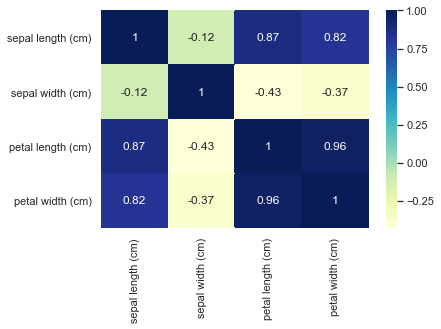

In [1]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Loading iris dataset
df = load_iris() 
X= pd.DataFrame(df.data, columns = df.feature_names)

#Using Pearson Correlation
plt.figure(figsize=(6,4))
corr = X.corr(method='pearson')

## Graphical view of correlation using heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

**Detection**: `Correlation Matrices and Plots` for correlation between all the X independent variable has shown in above plot. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.

<a id="2.5.2"></a>
### 2.5.2 Kendall Correlation
It is a measure of rank correlation: the similarity of the orderings of the data when ranked by each of the quantities.[Source](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)

Intuitively, the Kendall correlation between two variables will be high when observations have a similar (or identical for a `correlation of 1`) rank between the two variables, and low when observations have a dissimilar (or fully different for a `correlation of −1`) rank between the two variables.

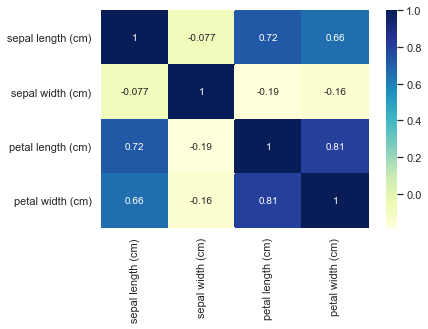

In [2]:
#Using Kendall Correlation
plt.figure(figsize=(6,4))
corr = X.corr(method='kendall')

## Graphical view of correlation using heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

<a id="2.5.3"></a>
### 2.5.3 Spearman Correlation
The `Spearman correlation` between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other. [Source](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

Spearman's coefficient is appropriate for both `continuous` and `discrete` ordinal variables.

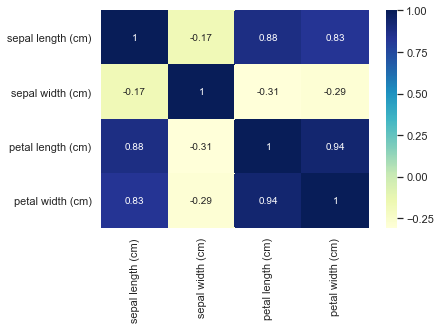

In [3]:
#Using Spearman Correlation
plt.figure(figsize=(6,4))
corr = X.corr(method='spearman')

## Graphical view of correlation using heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

<a id="2.5.4"></a>
### 2.5.4 Variance Inflation Factor (VIF)
* __Variance Inflation Factor:__ Regression of one X variable against other X variables.

     $$VIF=\frac {1}{(1-R{squared})}$$

     The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.

In [4]:
from sklearn.datasets import load_boston

boston = load_boston()

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# Finally, I like to include names so it is easier to explore the result
vif["Features"] = boston.feature_names

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(boston.data, i) for i in range(pd.DataFrame(boston.data).shape[1])]

vif

,Features,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


>**Note:** When number of columns are more go for VIF method

<a id="2.5.5"></a>
### 2.5.5 Pairplot by Seaborn

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from sklearn.datasets import load_iris

df = load_iris()
data=pd.DataFrame(df.data,columns=df.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


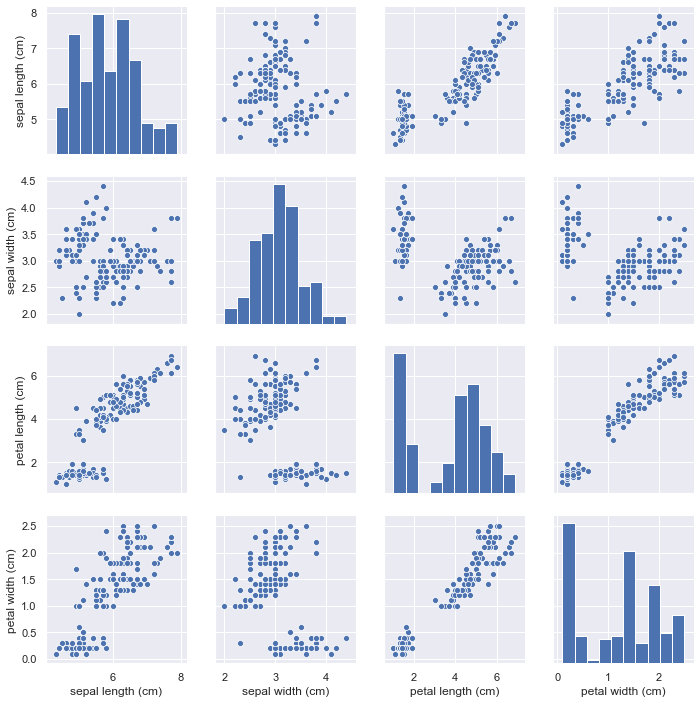

In [7]:
sns.pairplot(data=data)

>**Note:** Its very helpful to analyze the collinearity in dataset

<a id="2.5.6"></a>
### Remedies for Multicollinearity

* **Do Nothing:** If the Correlation is not that extreme, we can ignore it. If the correlated variables are not used in solving our business question, they can be ignored.
* **Remove One Variable**: Like in dummy variable trap
* **Combine the correlated variables:** Like creating a seniority score based on Age and Years of experience
* **Principal Component Analysis**